# How Does HTTPS Work? RSA Encryption Explained

## HTTP (HyperText Transfer Protocol)
Since the beginning, it has used the HyperText Transfer Protocol (HTTP) for moving information around the world. That’s why the beginning of web addresses start with HTTP.

> __HTTP is not secure__ because it transports information in plain text. 
This means that anyone who intercepts the traffic can read it. 

But people soon decided they wanted to use the internet for sensitive data (like credit card numbers), so we had to figure out a way to make HTTP secure so that no one could see your credit card number as it zoomed between your browser and the web server.

## HTTPS (HyperText Transfer Protocol Secure)
So in 1994, Netscape Communications enhanced HTTP with some encryption. Essentially, they married a new encryption protocol named __Secure Socket Layer (SSL)__ to the original HTTP. This became known as “HTTP over SSL” or “HTTP Secure”. Otherwise known as HTTPS.

Today, more than 50% of all websites are HTTPS. That number has been growing radically in the last few years since Edward Snowden revealed that the NSA is spying on everyone’s internet traffic.

The idea, as stated by many, is to migrate the entire internet into a completely HTTPS environment, where all website traffic is encrypted by default.

## Why encrypt the entire internet?
HTTPS does as much for privacy as for security. It’s one thing to keep hackers from reading your data or injecting their own code into your web sessions (which HTTPS prevents), but privacy is the other side of the coin.

## How HTTPS Works
HTTPS keeps your stuff secret by encrypting it as it moves between your browser and the website’s server. This ensures that anyone listening in on the conversation can’t read anything. This could include your ISP (internet service provider), a hacker, snooping governments, or anyone else who manages to position themselves between you and the web server.

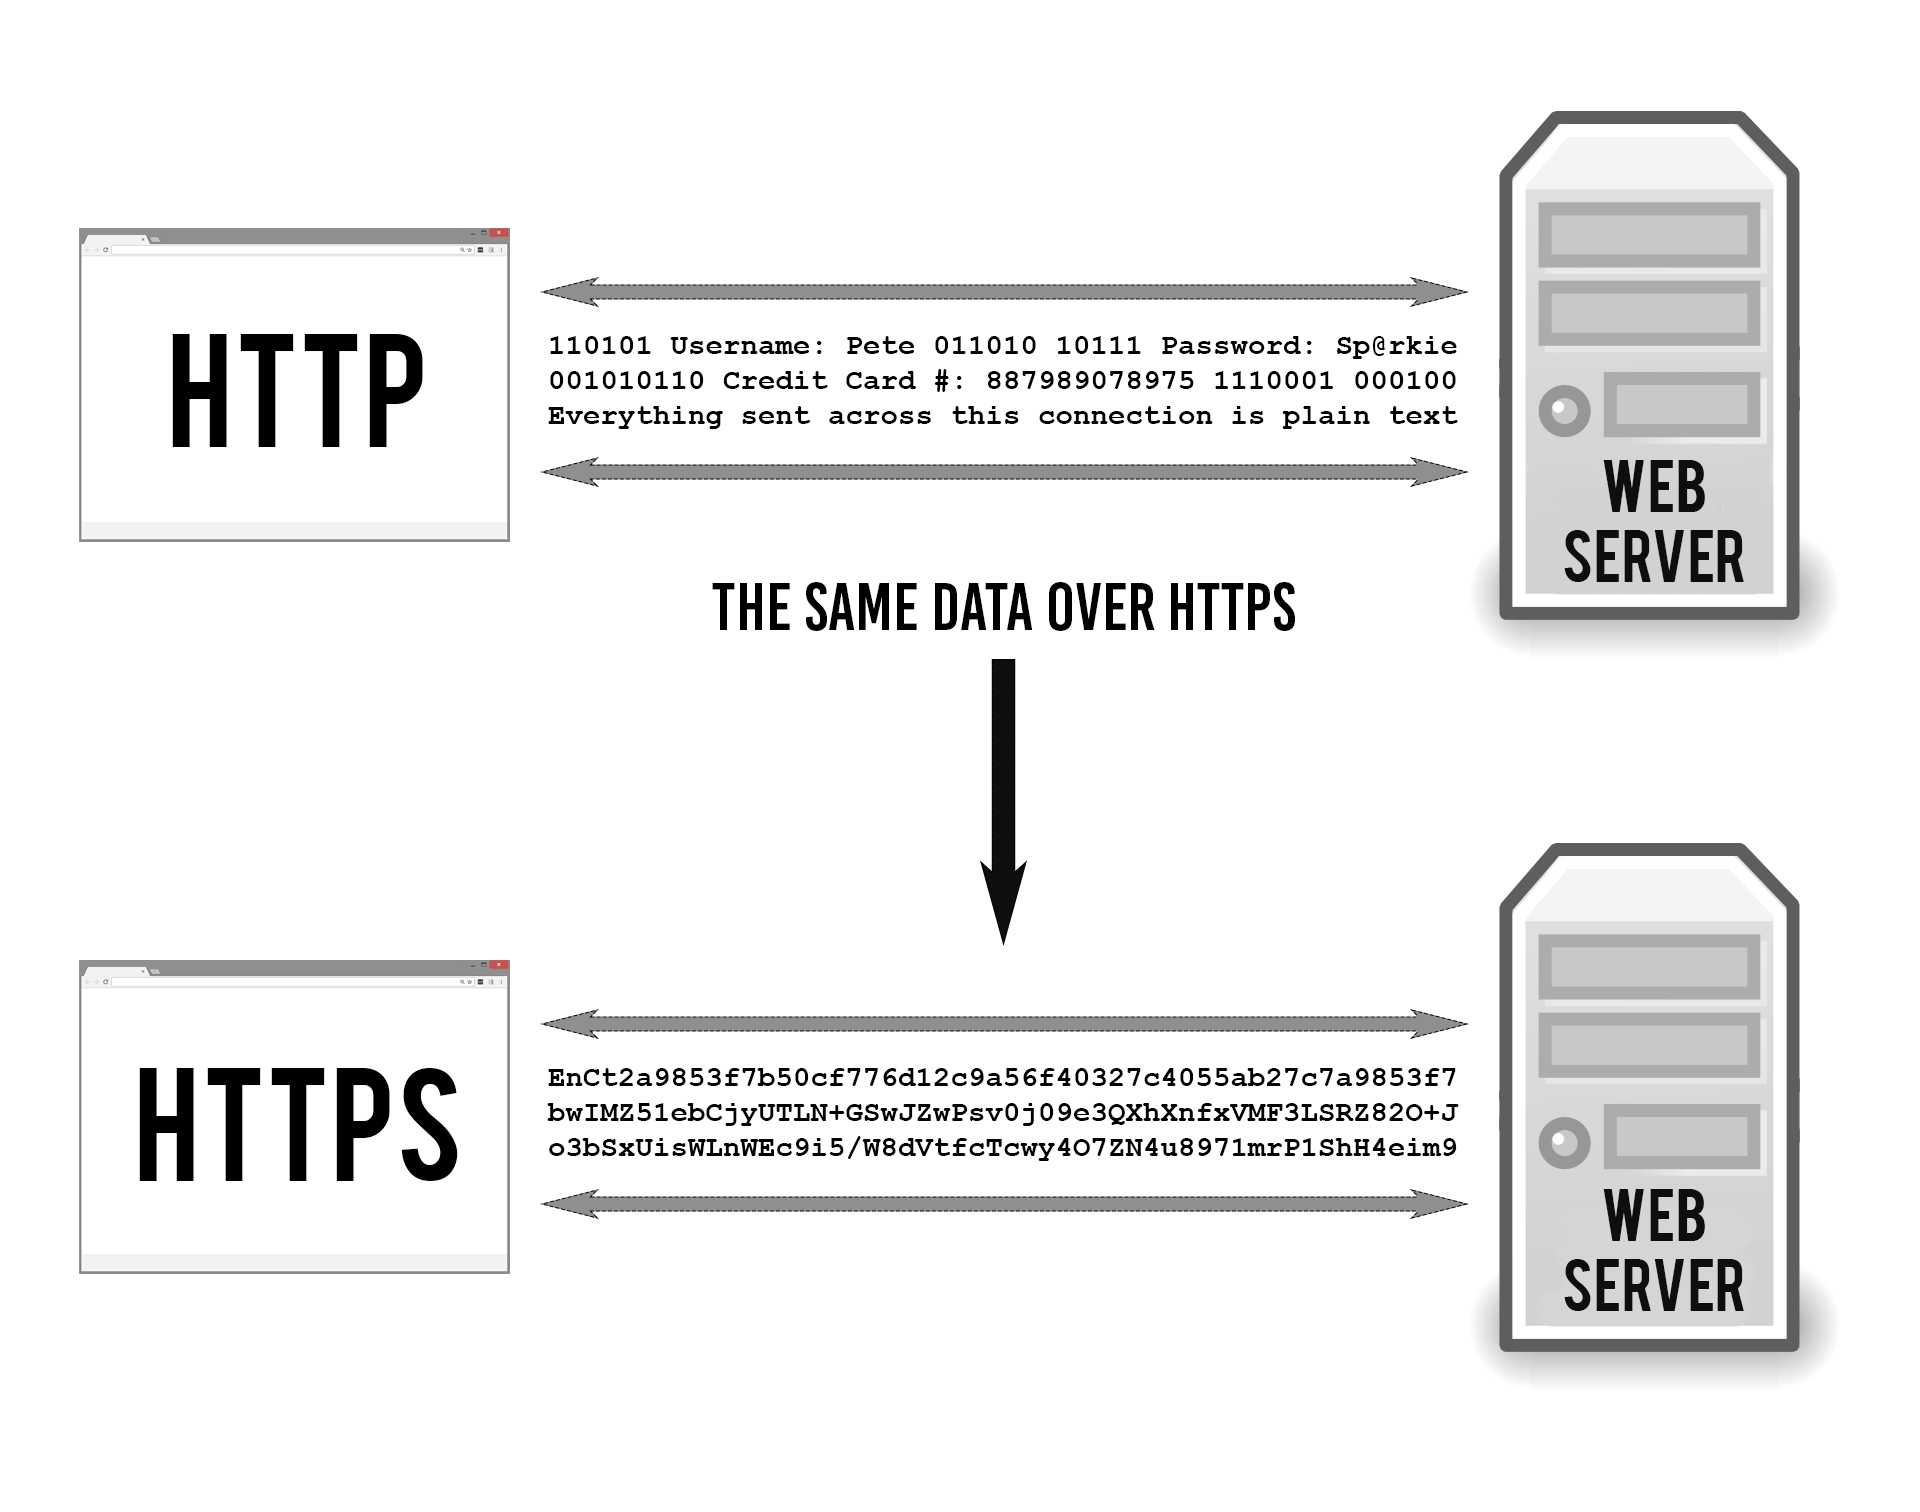

### Symmetric Encryption
For a long time, SSL was the standard protocol used by HTTPS. The newest version of SSL is now called Transport Layer Security (TLS) but they are essentially the same thing. I’ll refer to it from now on as SSL/TLS since both monikers are used interchangeably, but technically I’m talking about the newer TLS.

Essentially, you need three things to encrypt data:

The data you want to encrypt
A unique encryption key (just a long string of random text)
An encryption algorithm (a math function that “garbles” the data)
You plug the data and the key into the algorithm and what comes out the other side is cipher text. That is, the encrypted form of your data which looks like gibberish.

To decrypt the cipher text on the other end, you just reverse the process with the same key and it reverses the encryption, restoring the original form of the data. It’s the secrecy of the encryption key that makes the whole process work. Only the intended recipients of the data should have it, or else the purpose is defeated.

When you use the same encryption key on both ends it’s called symmetric encryption. This is what your home WiFi uses. You have just one key, or “password”, which you plug into both your wireless router and your laptop. Easy peasy.

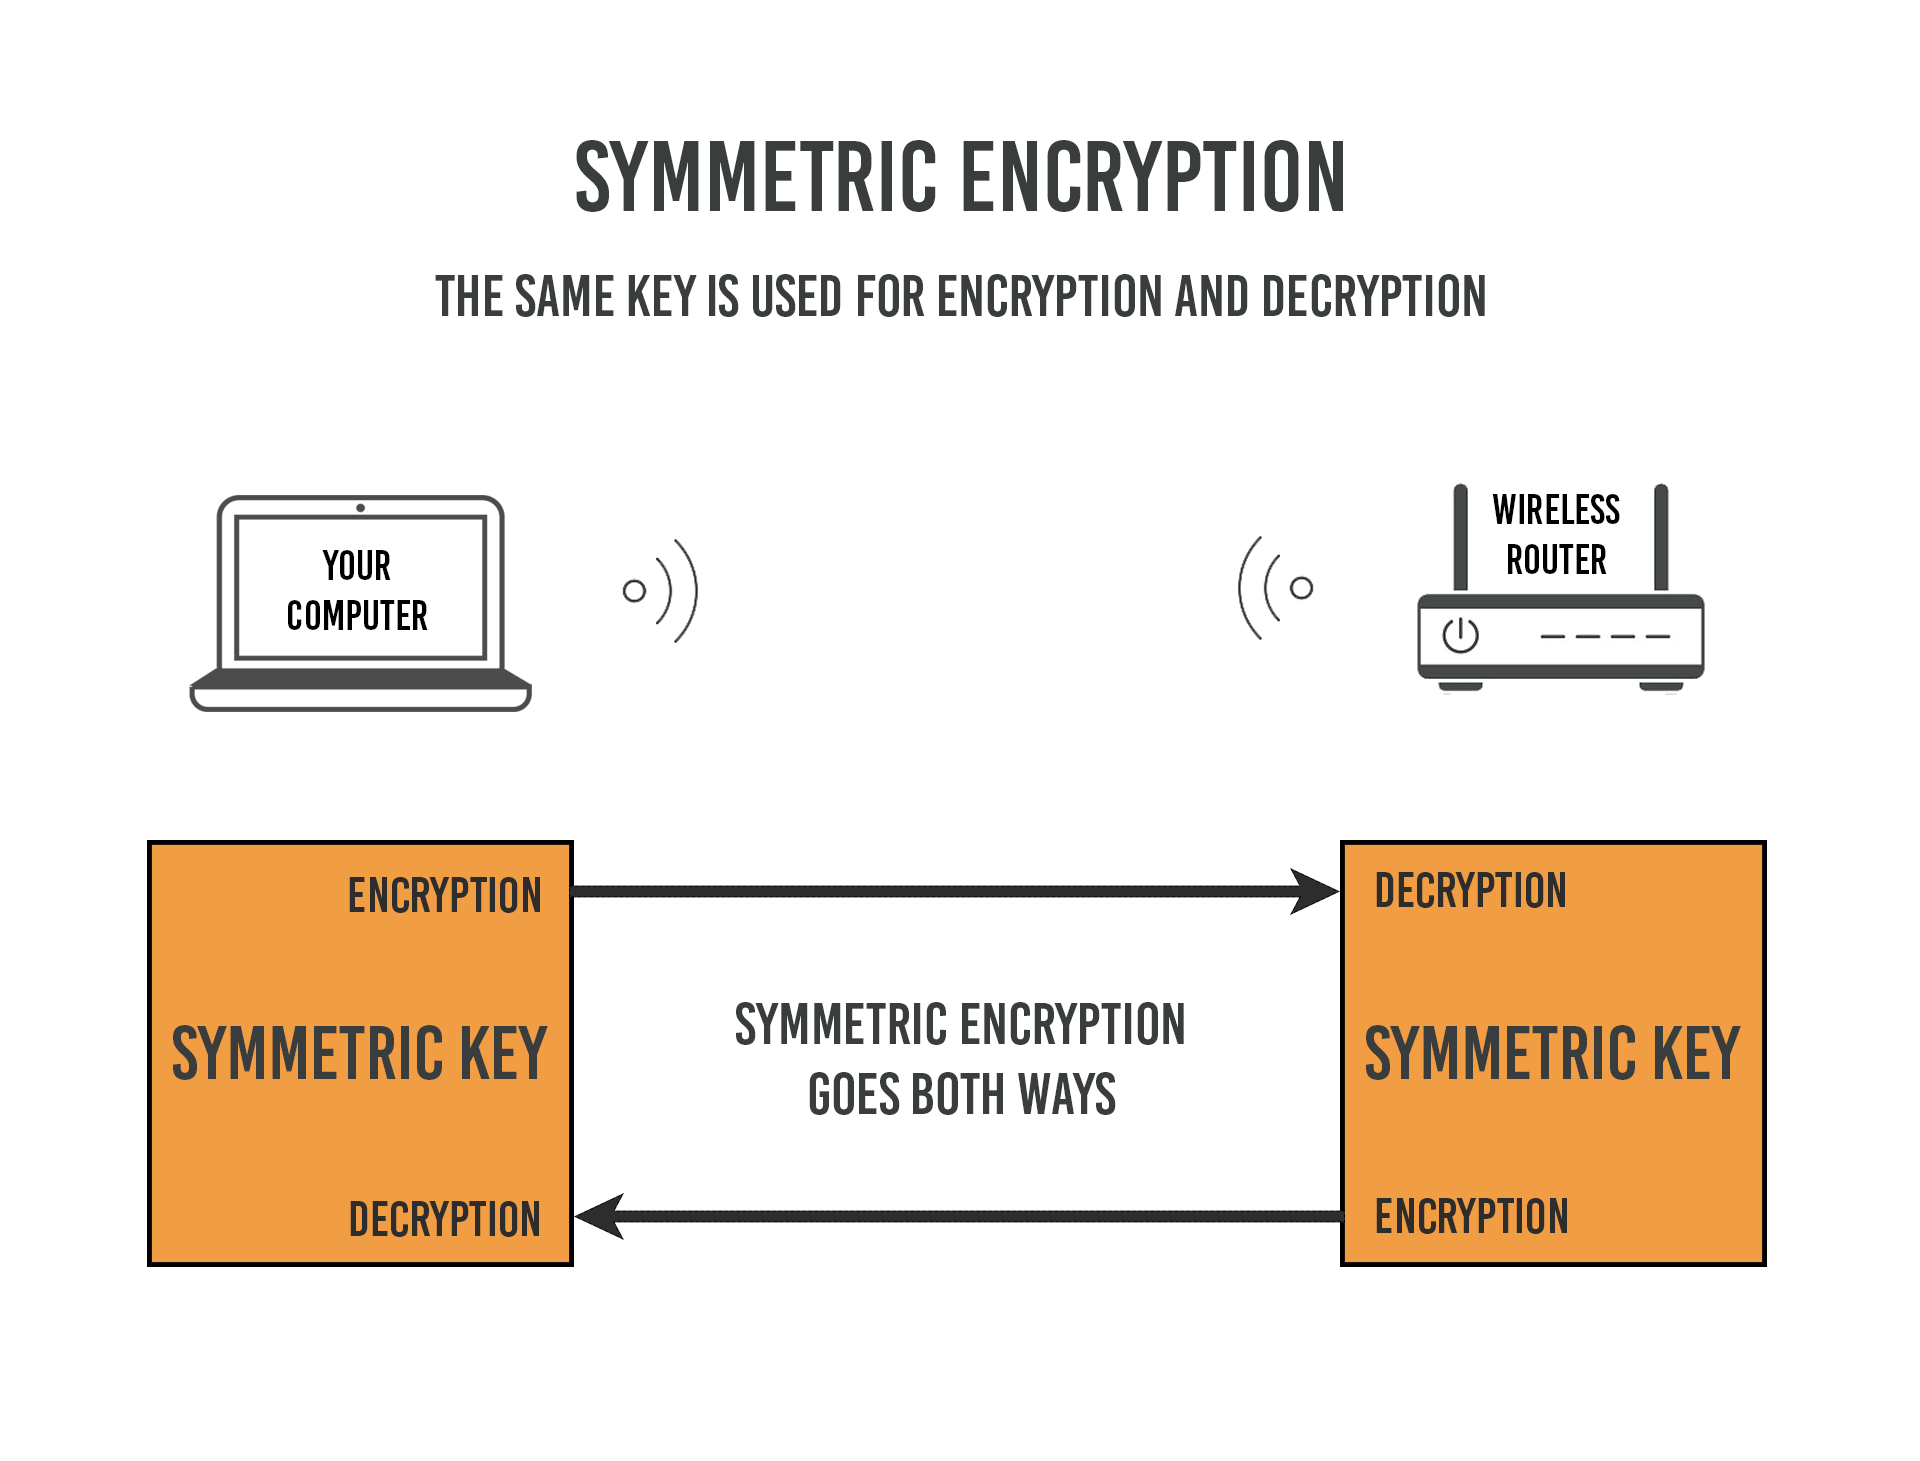

### Asymetric Encryption
But it becomes more complicated when connecting to a website on the public internet. Symmetric encryption, by itself, won’t work because you don’t control the other end of the connection. How do you share a secret key with each other without the risk of someone on the internet intercepting it in the middle?

This problem is solved with asymmetric encryption. Asymmetric means you’re using two different keys, one to encrypt and one to decrypt. We also call this Public Key Cryptography because it’s how we establish secure connections on the public internet.

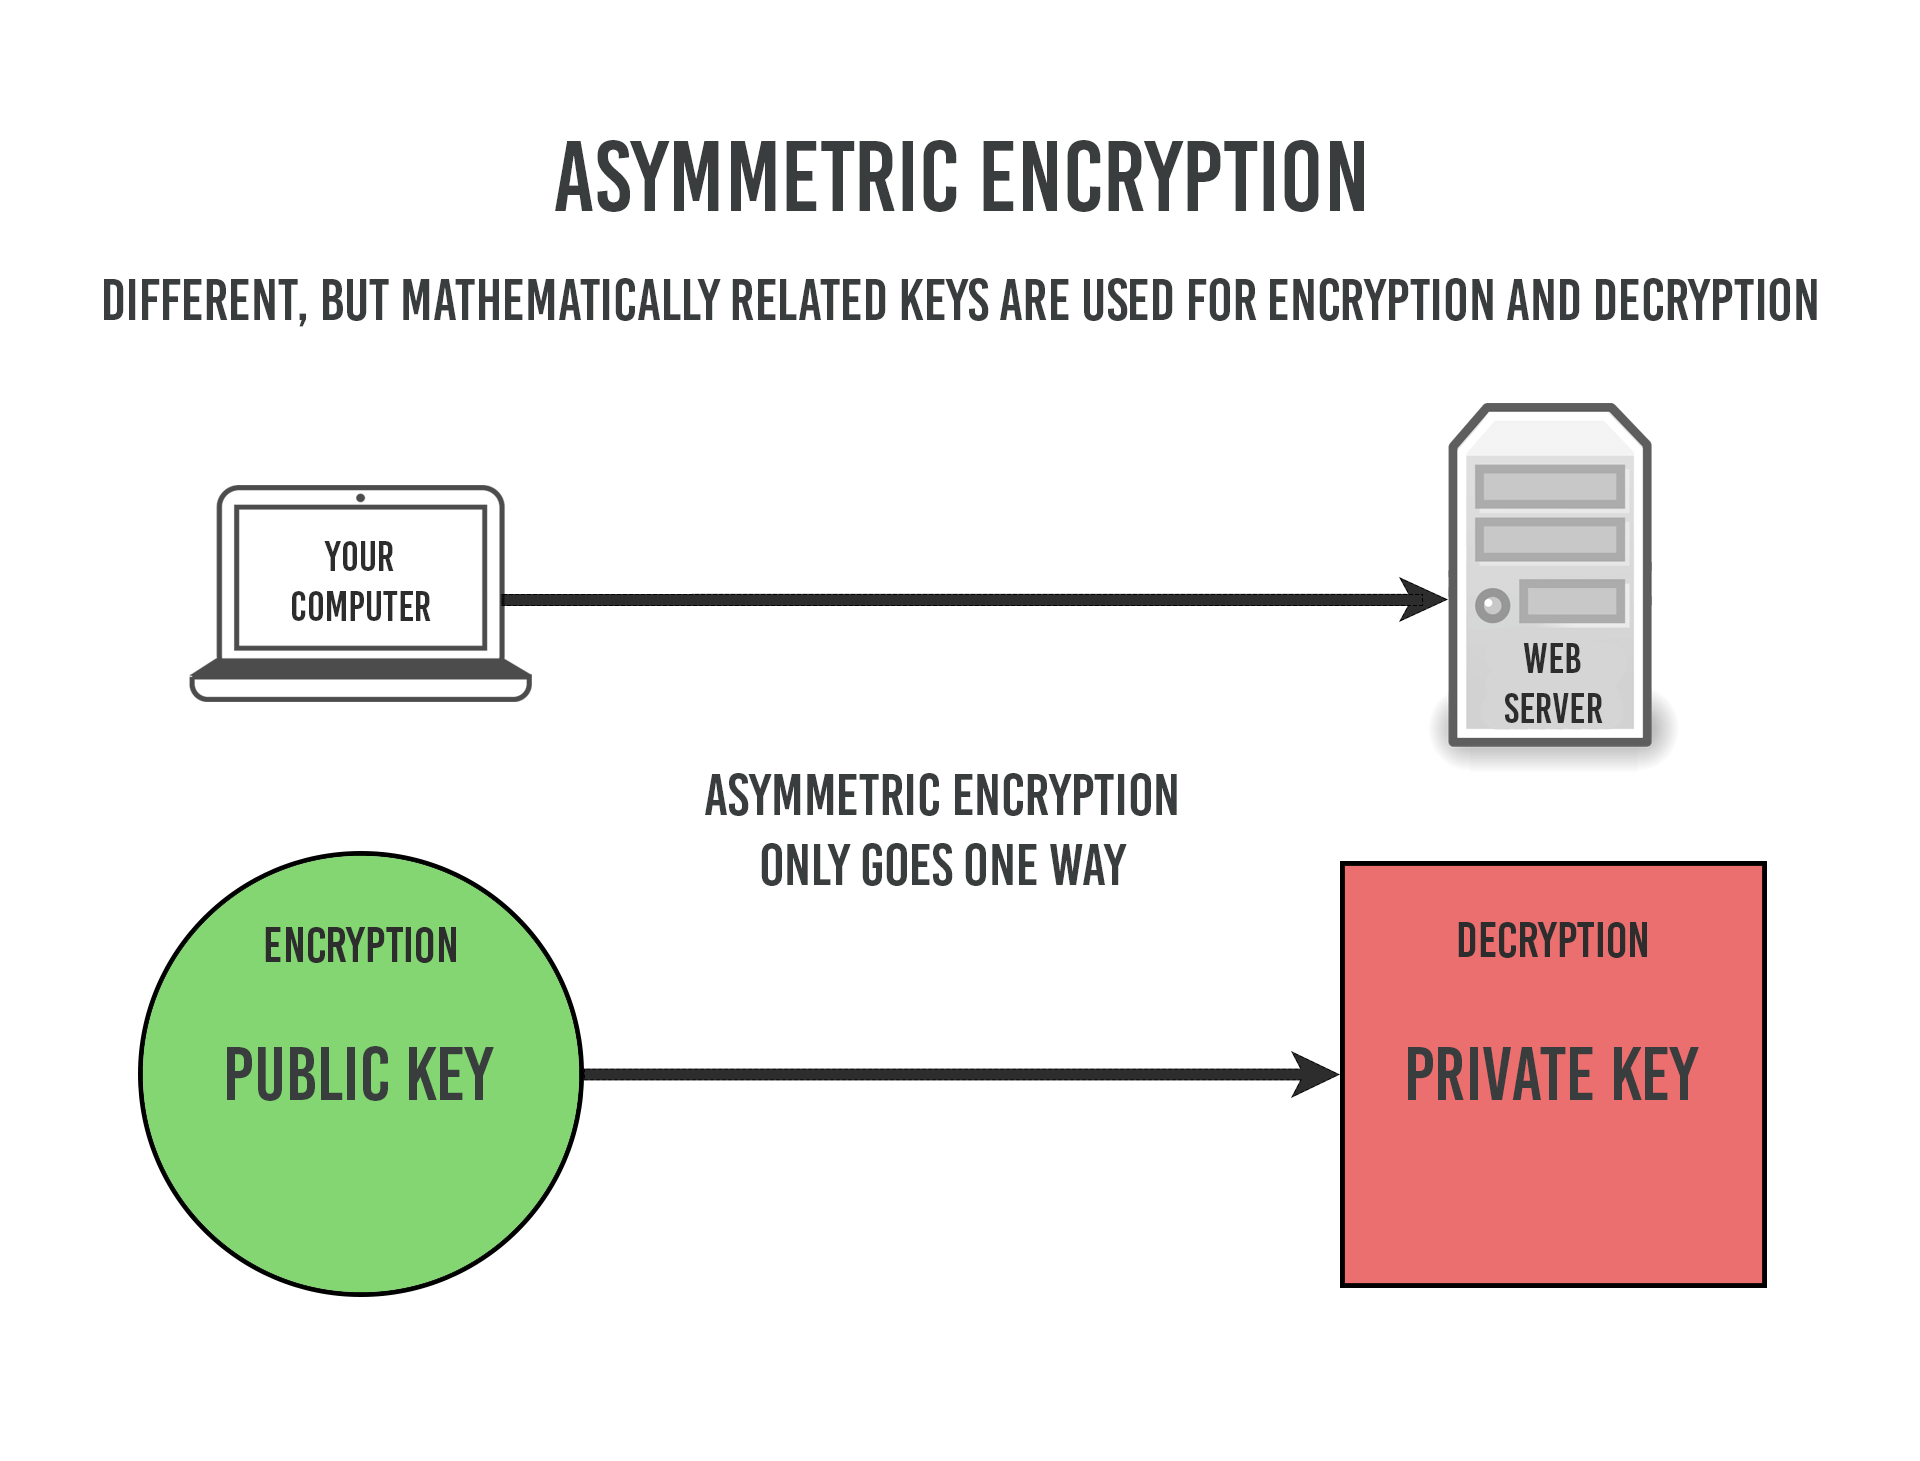

### Key-pairs
To understand asymmetric encryption, you need to know how two separate keys can encrypt and decrypt the same data. As it turns out, it’s just a math problem with very large numbers.

It requires a special mathematical process using very large prime numbers and modular arithmetic, among other things. The technical details are beyond the scope of this article but this is how it works conceptually.

Typically (not always) both the public and private keys are computed together at the same time, in the same mathematical process. This means they’re strongly related, mathematically speaking. Because of this relationship, they can be used to encrypt/decrypt the same data. And that is also why public and private keys from different key-pairs would not work together. Every web server has its own unique set, making your connection to the website unique from other sites.

However, the process can only go one direction. When one of the keys (either public or private) is used to encrypt some data, only the other key can be used to decrypt it. That’s just how the math conveniently works.

So it doesn’t matter who else has the public key because it’s worthless once the data has been encrypted. It can only be decrypted with the private key, which is stored in secret on the web server.

### How Public Key Cryptography Works
In the Public Key Infrastructure (PKI), both types of encryption are used. Asymmetric (public key) encryption is used first to establish the connection, which is then replaced with symmetric encryption (called the session) for the duration.

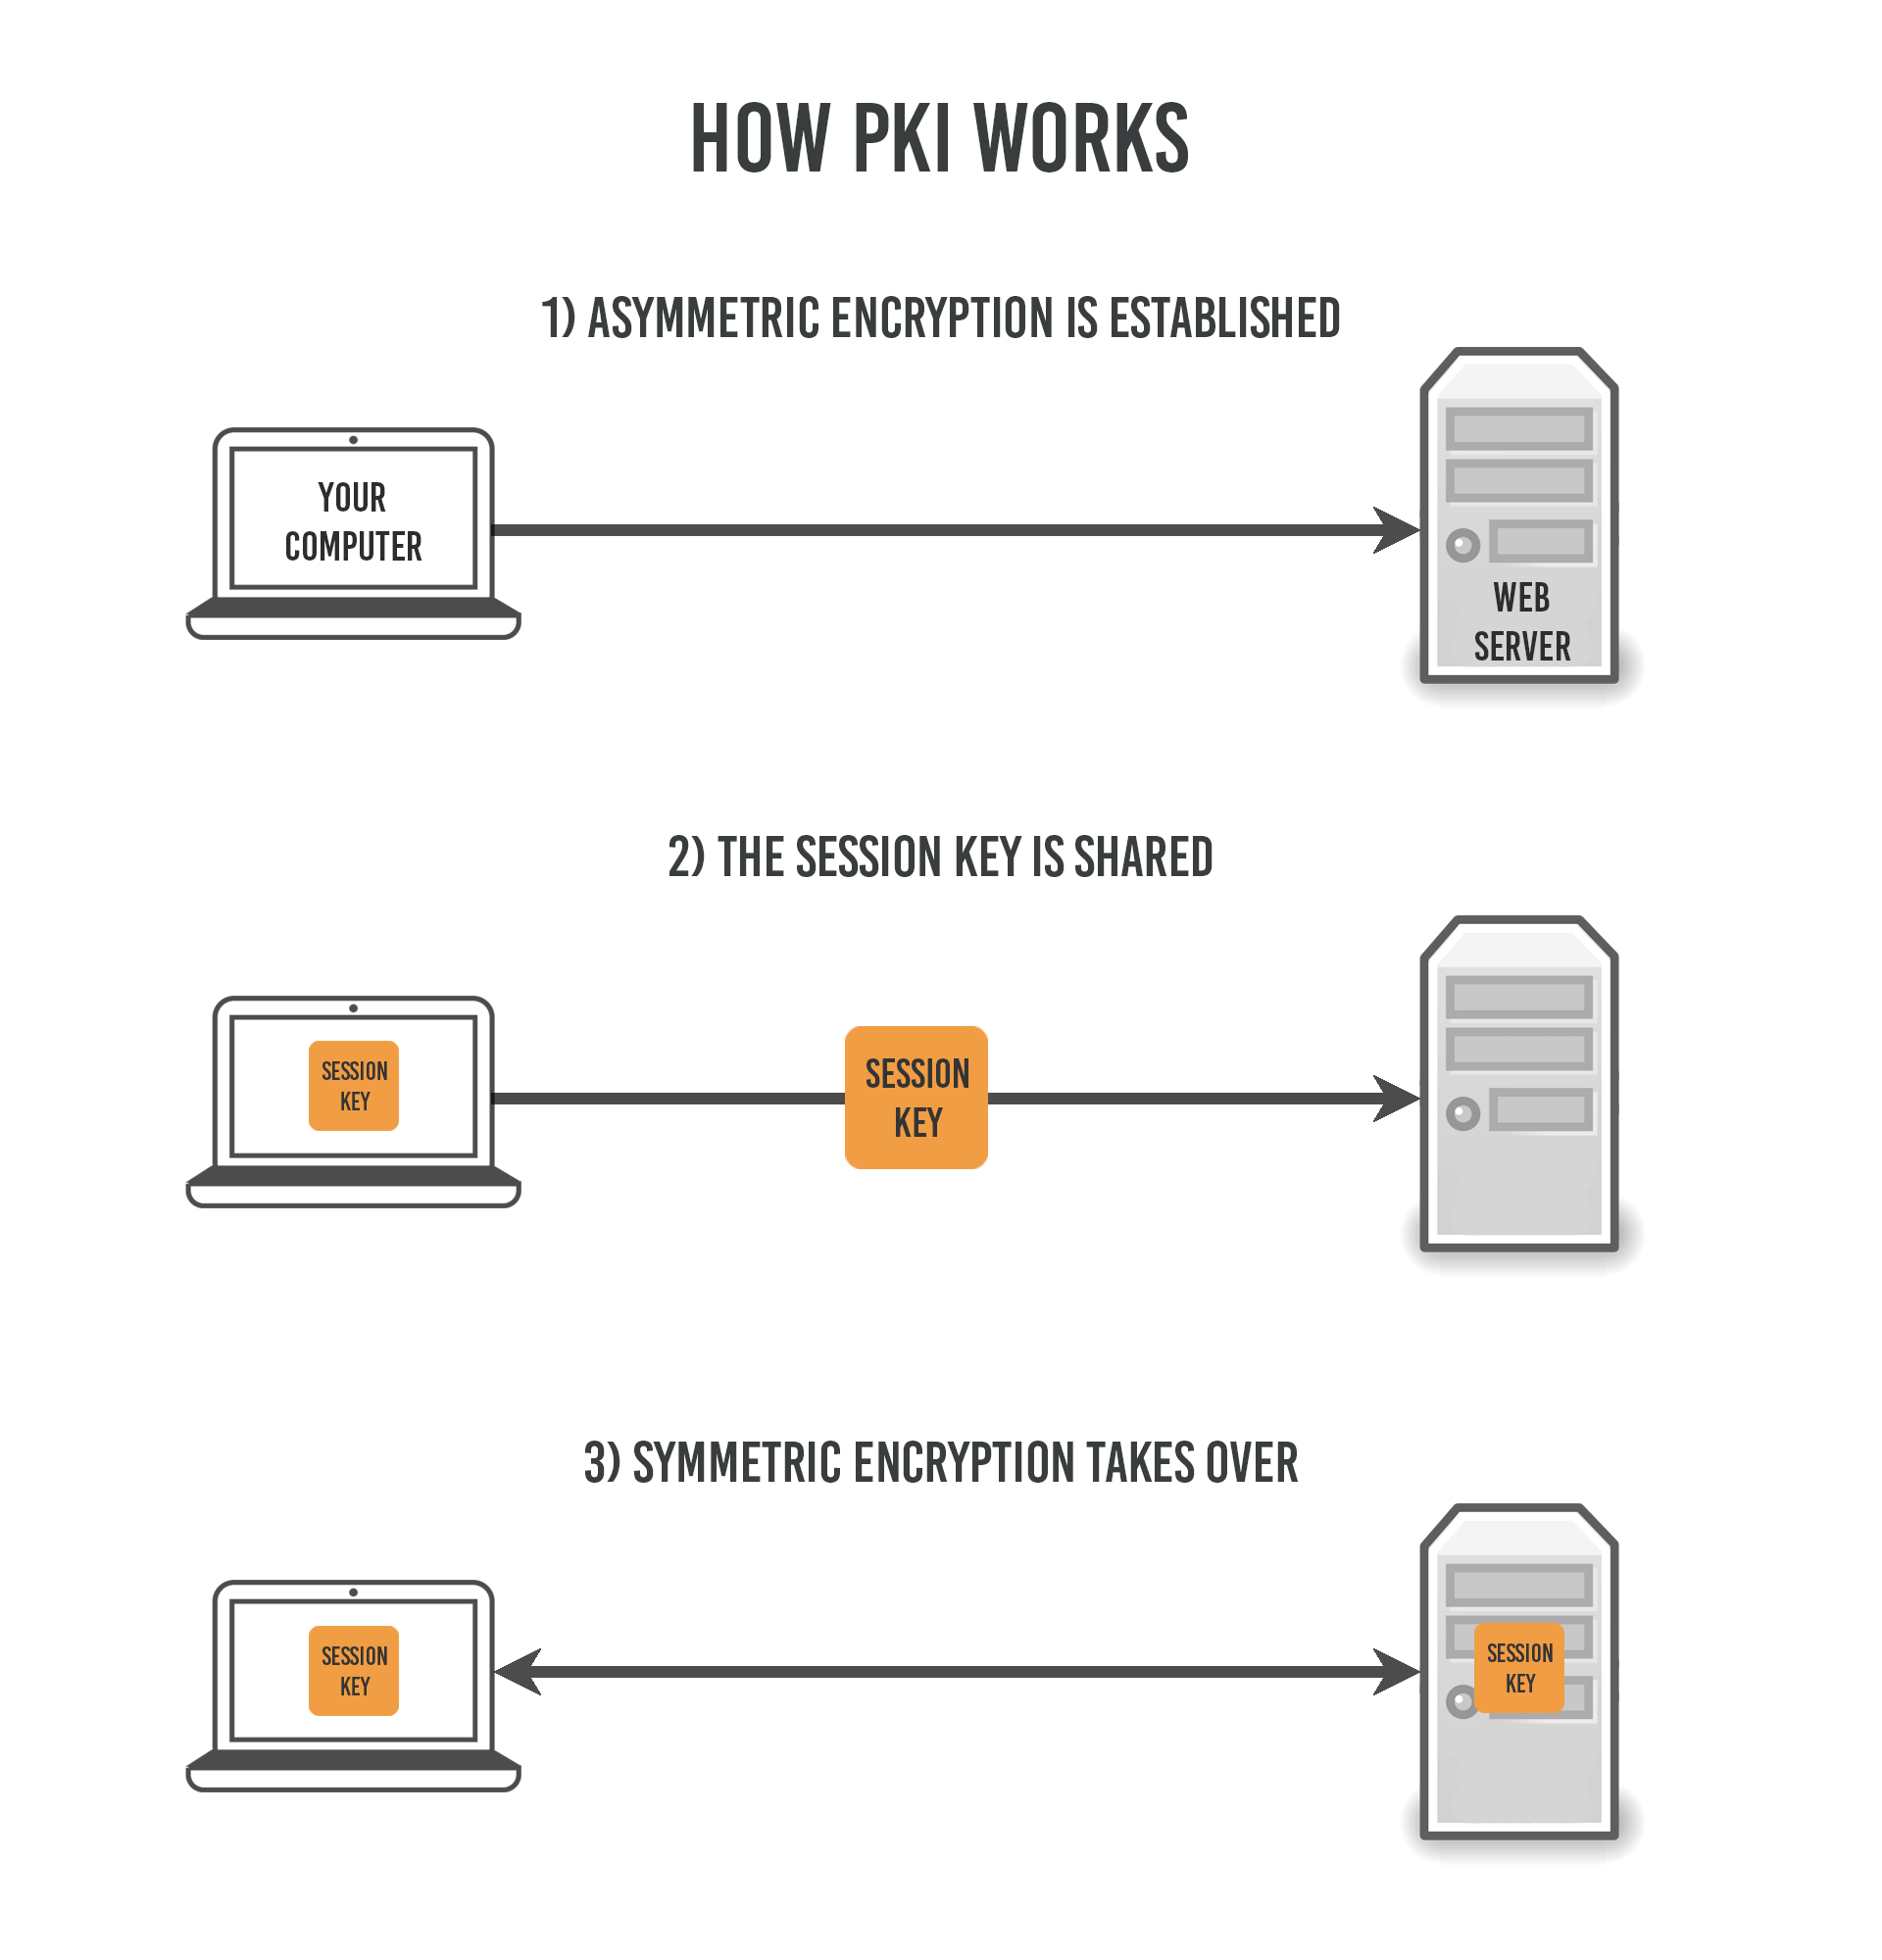


Here’s how it works in more detail:

Your browser reaches out to the website server and requests a connection.
The server sends you its public key. It keeps its private key a secret.
Your browser generates a third key called a session key.
The session key is encrypted by your computer using the public key you got from the server
The encrypted session key is then shared with the server.
The server decrypts the session key that it received from you using the secret private key. Now both ends have the session key that your computer generated.
The public key encryption is terminated and replaced with symmetric encryption.
Now you are in a session with the server using only symmetric encryption, and that’s how it remains until you leave the website.

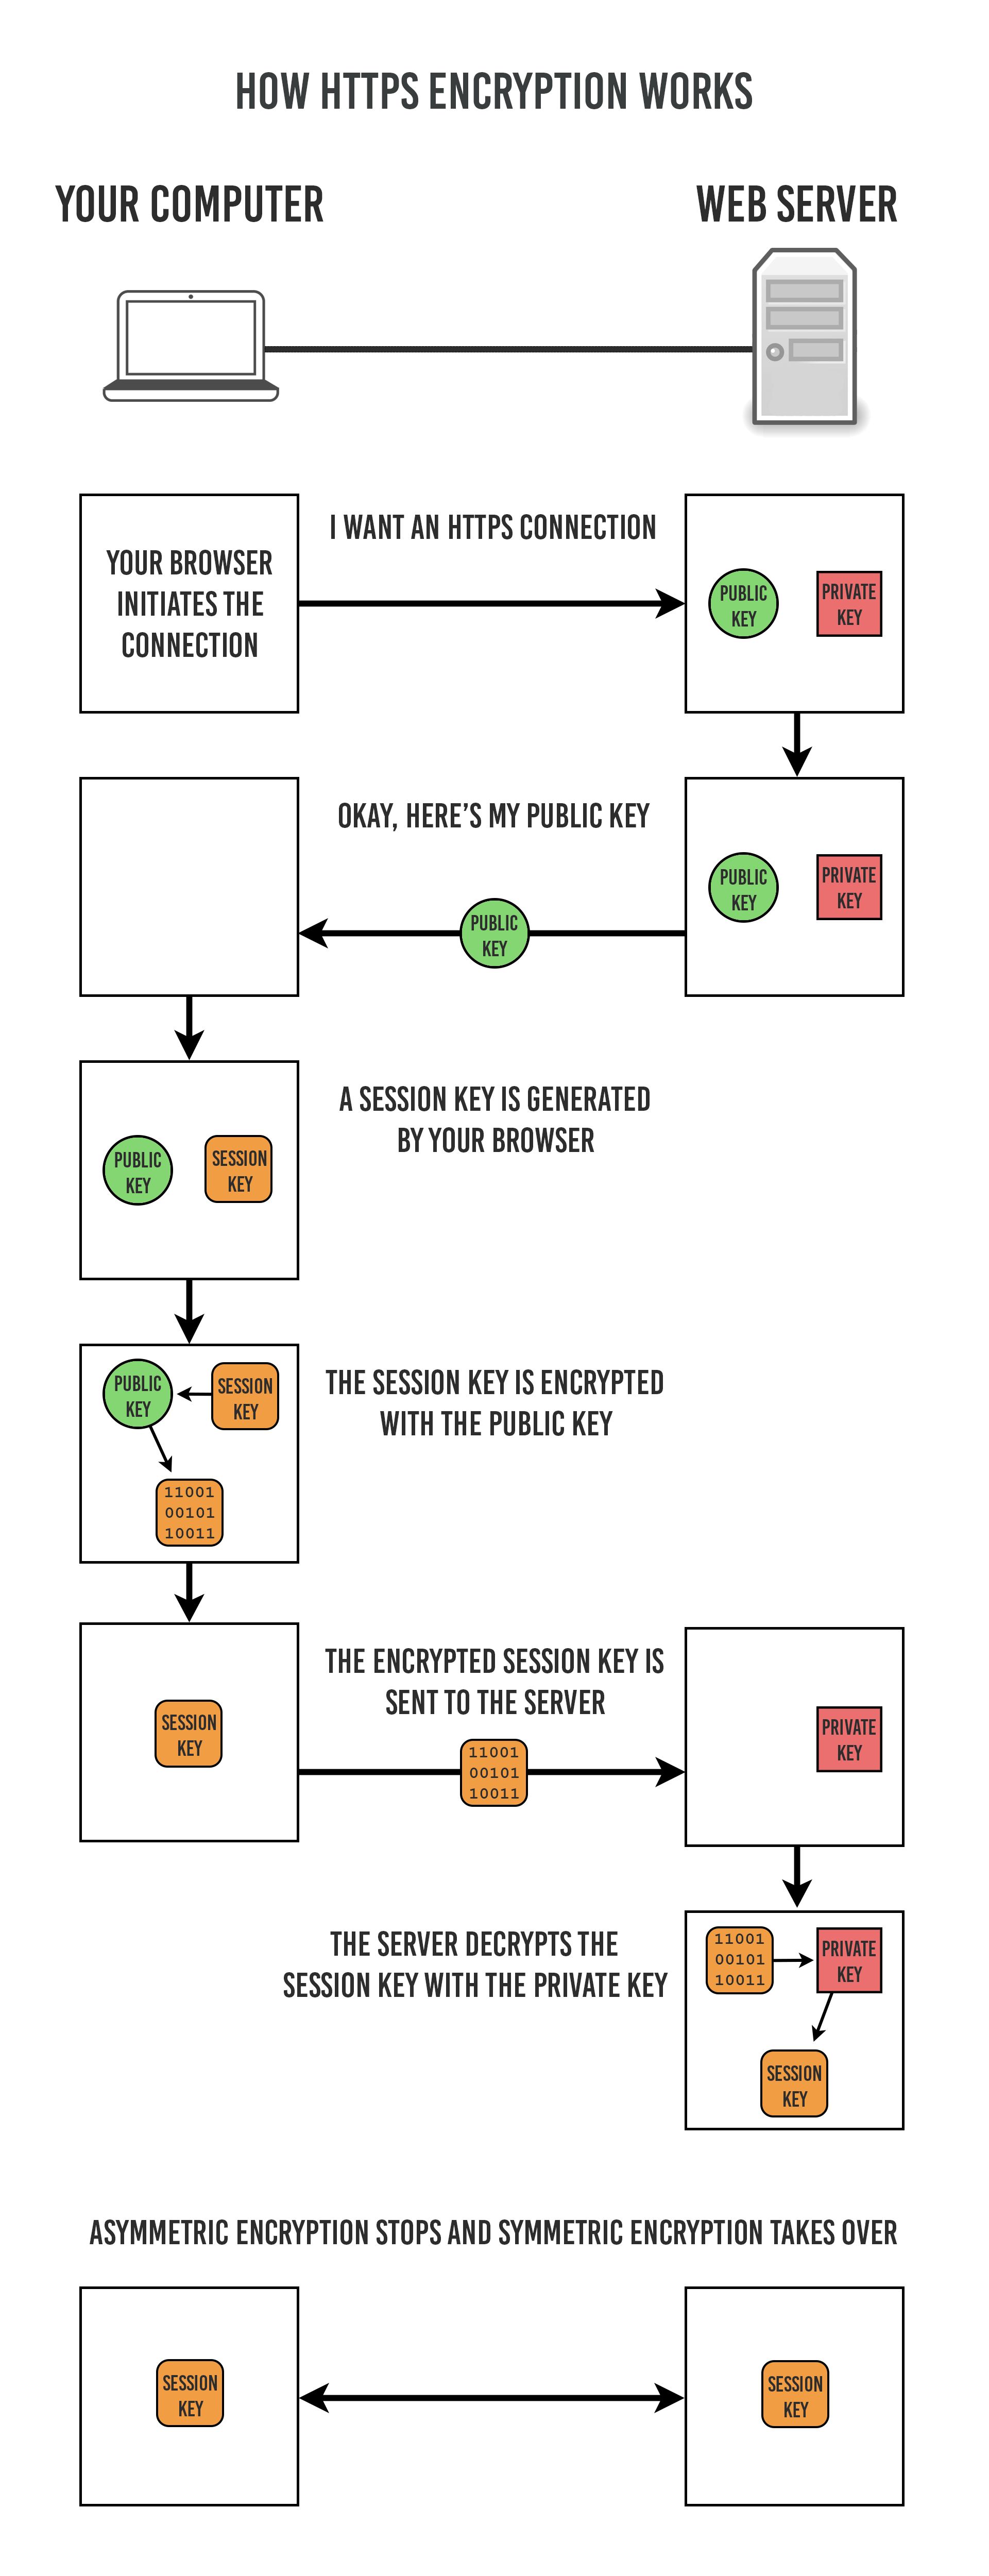

As you can see, public key (asymmetric) encryption is only used briefly in the beginning to exchange the third key which is used for the rest of the connection. But what’s the point of switching from asymmetric to symmetric? There are a couple reasons.

>First, public key encryption only goes one way. Your encrypted data going to the website is secure only because the web server keeps the private key a secret. But if the server tried sending encrypted data back to you with the same key-pair, it would not be secure because everyone has access to its public key. That means anyone could decrypt it. You would have to establish two asymmetric sessions, one going each way. It’s just not feasible for your computer to do that securely.

>Second, the mathematical overhead for asymmetric encryption is far higher and therefore requires much more computing power to sustain. It is not suitable for long sessions because of the processing power it takes to keep it going. Public key encryption uses much longer keys, which makes it far more labor-intensive. 

## What HTTPS Does Not Do

It’s easy to think of HTTPS as a miracle security solution for the internet, but there is a lot that it can’t do.

HTTPS does not:

1. Hide the names of websites that you’re visiting

This is because the name (aka “domain”) of the website is sent using DNS (domain name service), which is not inside the HTTPS tunnel. It is sent before the secure connection is made. An eavesdropper in the middle can see the name of the website you’re going to (e.g. TipTopSecurity.com), they just can’t read any of the actual content that’s being transferred back and forth. It won’t be until DNSSEC is fully implemented that this will change.

2. Protect you from visiting an evil website

HTTPS does not ensure that the website, itself, is safe. Just because you’re connecting securely doesn’t mean you’re not connecting to a website run by bad guys. We try to fix this problem with trusted Certificate Authorities but the system isn’t perfect (stay tuned for more on this).

3. Provide anonymity

HTTPS does not hide your physical location or personal identity. __Your personal IP address__ (your address on the internet) has to be attached to the outside of the encrypted data, because the internet wouldn’t know where to send it if your IP address was encrypted, too. And it also doesn’t obscure your identity to the website you’re visiting. The site you visit still knows everything about you that it would on a non-secure connection.

4. Prevent you from getting viruses

HTTPS is not a filter. It’s possible to receive viruses and other malware over an HTTPS connection. If the web server is infected or you’re on a malicious website that’s handing out malware, it will be sent inside the HTTPS stream just like everything else. HTTPS does, however, prevent anyone in the middle from injecting malware into your moving traffic.

5. Protect your computer from being hacked

HTTPS only protects the data while it’s moving between your computer and the web server. It does not offer any protection for your actual computer or the server, themselves. This also means that if there’s malware that’s monitoring traffic on one end of the connection, it can read the traffic before and after it’s encrypted inside the HTTPS stream.

__Basically, HTTPS only protects your information__ while it’s flowing through the wires (or the air). It can’t protect your computer, your identity, or hide which sites you’re visiting. HTTPS is only one part of a safer internet. If you’re looking for more privacy then a VPN service would be the next step. Check out this article for more about VPNs.

## Authentication
There’s another side to secure websites that we haven’t even begun to cover. It’s one thing to create an HTTPS connection, but how can you actually trust the web server you’re connected to? It doesn’t matter if your connection is encrypted if you’re connected to a phishing website that’s trying to steal your info.

We chose to solve this problem by implementing a third party system of Certificate Authorities.